In [128]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.datasets import mnist

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [66]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [67]:
x_train.shape

(60000, 28, 28)

In [68]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [69]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [70]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2)))
model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [71]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               409728    
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [73]:
model.fit(x_train, y_train, batch_size=128, epochs=6)

Epoch 1/6
469/469 [==============================] - 3s 6ms/step - loss: 0.5577 - accuracy: 0.9236
Epoch 2/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0627 - accuracy: 0.9809
Epoch 3/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0425 - accuracy: 0.9866
Epoch 4/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0325 - accuracy: 0.9901
Epoch 5/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0283 - accuracy: 0.9909
Epoch 6/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0225 - accuracy: 0.9927


In [74]:
model.predict(x_test)

array([[6.7676448e-10, 3.6502176e-13, 2.5885205e-07, ..., 9.9999928e-01,
        2.8767524e-09, 2.6494593e-10],
       [9.7033353e-07, 2.4759836e-12, 9.9999905e-01, ..., 6.5886492e-15,
        2.3269390e-12, 9.0412121e-14],
       [5.6425711e-07, 9.9987853e-01, 1.8024380e-08, ..., 2.9656245e-05,
        6.1137136e-05, 3.7564569e-06],
       ...,
       [7.4128170e-14, 1.6446110e-10, 6.7516864e-18, ..., 4.7600427e-08,
        2.6187852e-09, 4.0641308e-09],
       [1.7403142e-08, 2.1670221e-11, 2.5055371e-11, ..., 4.1979006e-10,
        8.4772074e-07, 1.0402630e-06],
       [1.1141485e-13, 1.1734032e-15, 3.7328846e-10, ..., 6.2540903e-17,
        4.0601119e-08, 4.7363957e-12]], dtype=float32)

In [52]:
np.round(model.predict(x_test))

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [53]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [54]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0388 - accuracy: 0.9887


[0.038768310099840164, 0.9886999726295471]

---

In [75]:
from sklearn.metrics import confusion_matrix

p_test = model.predict(x_test).argmax(axis=1)
p_test, p_test.shape

(array([7, 2, 1, ..., 4, 5, 6]), (10000,))

In [82]:
y_test = y_test.argmax(axis=1)
# argmax(a,axis) : axis에 해당하는 값들 중, 가장 큰 값의 인덱스를 반환
y_test, y_test.shape

(array([7, 2, 1, ..., 4, 5, 6]), (10000,))

In [83]:
confusion_matrix(y_test, p_test)

array([[ 979,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [   5, 1119,    2,    2,    0,    0,    1,    3,    3,    0],
       [   2,    0, 1026,    0,    0,    0,    0,    4,    0,    0],
       [   0,    0,    1,  998,    0,    6,    0,    2,    2,    1],
       [   2,    0,    2,    0,  971,    0,    2,    0,    2,    3],
       [   2,    0,    1,    4,    0,  878,    1,    0,    1,    5],
       [   6,    1,    0,    0,    1,    2,  946,    0,    2,    0],
       [   0,    1,    7,    1,    2,    0,    0, 1011,    2,    4],
       [   4,    0,    2,    0,    2,    1,    0,    1,  959,    5],
       [   1,    0,    2,    0,    7,    3,    0,    3,    1,  992]])

Text(0.5, 1.0, 'true:7, pre: 2')

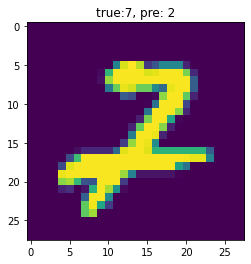

In [119]:
import matplotlib.pyplot as plt
missclass = np.where(y_test != p_test)
i = np.random.choice(missclass[0])
X_test = np.squeeze(x_test)
plt.imshow(X_test[i])
plt.title("true:%s, pre: %s" % (y_test[i], p_test[i]))

In [115]:
missclass

(array([ 247,  321,  340,  445,  449,  450,  495,  557,  619,  684,  720,
         947, 1014, 1039, 1112, 1226, 1232, 1247, 1319, 1364, 1414, 1522,
        1527, 1530, 1681, 1754, 1790, 1901, 1993, 2018, 2035, 2043, 2070,
        2098, 2118, 2130, 2182, 2266, 2293, 2369, 2380, 2414, 2462, 2597,
        2654, 2668, 2742, 2778, 2896, 2927, 2939, 2953, 2995, 3005, 3030,
        3073, 3115, 3225, 3289, 3422, 3451, 3520, 3558, 3727, 3762, 3767,
        3778, 3808, 3838, 4027, 4284, 4575, 4578, 4639, 4690, 4740, 4761,
        4807, 4808, 4814, 4823, 4951, 4956, 5176, 5246, 5888, 5955, 5973,
        5981, 5997, 6042, 6555, 6571, 6597, 6625, 6783, 7434, 7847, 7856,
        7899, 7900, 7928, 7990, 8000, 8128, 8277, 8408, 8520, 8527, 8607,
        9009, 9587, 9642, 9664, 9679, 9692, 9698, 9729, 9770, 9839, 9905]),)

In [116]:
model.predict(x_test)[340]

array([1.43222705e-08, 1.46786124e-05, 9.75928973e-12, 7.83258617e-01,
       1.83661214e-07, 2.16720805e-01, 5.69929671e-06, 1.41473600e-09,
       8.92661234e-08, 3.22628111e-08], dtype=float32)

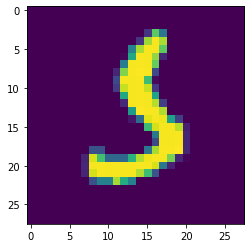

In [117]:
plt.imshow(X_test[340])

---

```
0 티셔츠/탑
1 바지
2 풀오버(스웨터의 일종)
3 드레스
4 코트
5 샌들
6 셔츠
7 스니커즈
8 가방
9 앵클 부츠
```

In [274]:
T = tf.keras.datasets.fashion_mnist
(x2_train, y2_train),(x2_test, y2_test) = T.load_data()

In [275]:
x2_train.shape, y2_train.shape

((60000, 28, 28), (60000,))

In [276]:
y2_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [349]:
print(x2_train[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

(<matplotlib.image.AxesImage at 0x7f648f57c9e8>, 0)

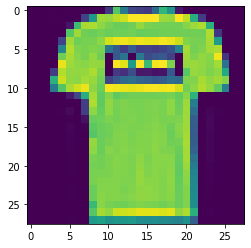

In [310]:
plt.imshow(x2_train[1]), y2_train[1]

In [311]:
# 원-핫 인코딩
Y2_train = keras.utils.to_categorical(y2_train)
Y2_test = keras.utils.to_categorical(y2_test)
#y_train = keras.utils.to_categorical(y_train)
Y2_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [280]:
# 학습을 위해 data shape 을 변경. 연산을 위해 float 32 로 변경
#X2_train = x2_train.reshape(60000, 784)
#X2_test = x2_test.reshape(10000, 784)
#X2_train = X2_train.astype('float32')
#X2_test = X2_test.astype('float32')

In [234]:
model2 = keras.Sequential()
#model = keras.Sequential()

In [235]:
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(256, activation='relu', input_shape=(784,)))
model2.add(keras.layers.Dense(128, activation='relu'))
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))

In [236]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [237]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_63 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_64 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_65 (Dense)             (None, 10)                1290      
Total params: 251,658
Trainable params: 251,658
Non-trainable params: 0
_________________________________________________________________


In [238]:
X2_train.shape, Y2_train.shape

((60000, 784), (60000, 10))

In [243]:
model2.fit(X2_train, Y2_train, batch_size=32, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2966 - accuracy: 0.8935
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2921 - accuracy: 0.8955
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2931 - accuracy: 0.8952
Epoch 4/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2862 - accuracy: 0.8978
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2764 - accuracy: 0.9016
Epoch 6/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2771 - accuracy: 0.9002
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2770 - accuracy: 0.9011
Epoch 8/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2725 - accuracy: 0.9041


In [370]:
model2.predict(X2_test)

array([[1.6221781e-17, 1.5708400e-12, 2.0952783e-17, ..., 1.6630638e-02,
        6.0322998e-07, 9.7581679e-01],
       [2.7872668e-06, 9.6541379e-09, 9.9887341e-01, ..., 5.6157886e-19,
        5.9376313e-09, 3.7673942e-15],
       [3.6857372e-14, 1.0000000e+00, 2.8975210e-20, ..., 0.0000000e+00,
        4.6549791e-22, 2.1672769e-38],
       ...,
       [1.3568028e-07, 8.0901258e-12, 1.4790251e-09, ..., 9.1388355e-13,
        9.9999988e-01, 5.4541646e-17],
       [2.6653725e-13, 9.9999988e-01, 2.3527602e-18, ..., 0.0000000e+00,
        2.4933460e-19, 2.4454533e-36],
       [1.0559510e-06, 5.7114522e-09, 1.1568945e-07, ..., 1.2348916e-03,
        1.0247994e-03, 1.2432862e-03]], dtype=float32)

# CNN

In [281]:
# 차원 늘리기
x3_train = np.expand_dims(x2_train, -1)
x3_test = np.expand_dims(x2_test, -1)
x3_train.shape, x3_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [291]:
K = len(set(y2_train))
K

10

In [312]:
# 원-핫 인코딩
y3_train = keras.utils.to_categorical(y2_train)
y3_test = keras.utils.to_categorical(y2_test)
Y2_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [293]:
model3 = keras.Sequential()

In [294]:
model3.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model3.add(keras.layers.MaxPool2D(pool_size=(2)))
model3.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model3.add(keras.layers.MaxPool2D(pool_size=(2)))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(128, activation='relu'))
model3.add(keras.layers.Dense(64, activation='relu'))
model3.add(keras.layers.Dense(10, activation='softmax'))

In [295]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [346]:
model3.fit(x3_train, y3_train, batch_size=64, epochs=6)

Epoch 1/6
938/938 [==============================] - 4s 4ms/step - loss: 0.0457 - accuracy: 0.9846
Epoch 2/6
938/938 [==============================] - 4s 4ms/step - loss: 0.0406 - accuracy: 0.9857
Epoch 3/6
938/938 [==============================] - 4s 4ms/step - loss: 0.0431 - accuracy: 0.9857
Epoch 4/6
938/938 [==============================] - 4s 4ms/step - loss: 0.0434 - accuracy: 0.9850
Epoch 5/6
938/938 [==============================] - 4s 4ms/step - loss: 0.0385 - accuracy: 0.9872
Epoch 6/6
938/938 [==============================] - 4s 4ms/step - loss: 0.0404 - accuracy: 0.9861


In [318]:
x3_train.shape, y3_train.shape

((60000, 28, 28, 1), (60000, 10))

In [319]:
np.round(model3.predict(x3_test))[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [320]:
y3_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [347]:
score = model3.evaluate(x3_test, y3_test,
                       verbose=2)# verbose는 얼마나 정보를 자세하게 나타낼 것인가. 0,1,2 세가지로 나뉨
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 - 1s - loss: 0.7274 - accuracy: 0.8977
Test score: 0.7274001240730286
Test accuracy: 0.8977000117301941


In [325]:
model.predict(x_test)[0]

array([6.7676448e-10, 3.6502176e-13, 2.5885205e-07, 3.2562085e-07,
       8.6647795e-08, 1.1249281e-11, 3.0011338e-16, 9.9999928e-01,
       2.8767524e-09, 2.6494593e-10], dtype=float32)

In [323]:
model.predict(x_test).argmax(axis=1)
# softmax 로 나온 결과를 원래 결과로 되돌려주기 위한 방법
# argmax(a,axis) : axis에 해당하는 값들 중, 가장 큰 값의 인덱스를 반환

array([7, 2, 1, ..., 4, 5, 6])

In [354]:
# Plot confusion matrix 를 통해 맞는값들과 틀린값들을 비교해 보자. 
from sklearn.metrics import confusion_matrix
p_test = model.predict(x3_test).argmax(axis=1)
y_test = y3_test.argmax(axis=1)
confusion_matrix(y_test, p_test)
# confusion_matrix : https://velog.io/@tonyhan18/머신러닝-성능-평가-명령

array([[ 45,   0,  19,   3,   0,  32,  14,  20, 862,   5],
       [382,  15,   2,   2,   0,   0,   0,   1, 595,   3],
       [312,   0,  33,   0,   2,   5,  93,   3, 547,   5],
       [ 68, 102,  33,  49,   7,   8,  19,  26, 688,   0],
       [387,   0,  40,   3,   5,   1,  50,  12, 496,   6],
       [ 98,   0, 618,  40,  14, 155,  13,   8,  48,   6],
       [209,   1,  30,   1,   4,   9,  28,   7, 704,   7],
       [136,   2, 631,   0, 130,   1,  51,   0,  48,   1],
       [239,   2, 133,   4,  39,  11, 191,   7, 372,   2],
       [ 57, 156, 397,  60,   1, 160,  39,   0, 130,   0]])

In [365]:
p_test, y_test

NameError: ignored

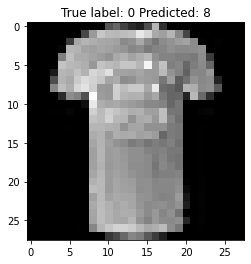

In [341]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
x_test = x3_test.reshape(10000, 28,28)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));
# np.where() : where함수는 조건문을 사용, 출력은 인덱스

```
0 티셔츠/탑
1 바지
2 풀오버(스웨터의 일종)
3 드레스
4 코트
5 샌들
6 셔츠
7 스니커즈
8 가방
9 앵클 부츠
```

In [330]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               409728    
_________________________________________________________________
dense_4 (Dense)              (None, 64)               